# ELG7186 - fall 2022 - Assignment 1
## Due: <strong>Wednesday Oct. 12<sup>th</sup> 2022 -- 11:59pm</strong>

The purpose of this assignment is to gain some experience working with the tools you will use throughout the course. You will learn:
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you will submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


## Part 0. Dataset Preparation
To complete the assignment you will need to download the Cifar10 dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from scipy.stats import mode
from skimage import io
from sklearn import preprocessing
import skimage 
from PIL import Image
# To plot pretty figuresd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [2]:
#import data into variables and check their shape.

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)


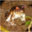

In [3]:
from PIL import Image
display(Image.fromarray(x_train[0]))

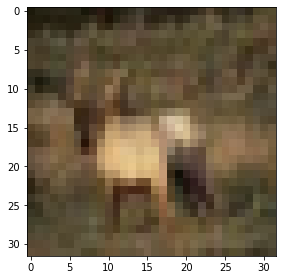

In [4]:
im=skimage.io.imshow(x_train[3])

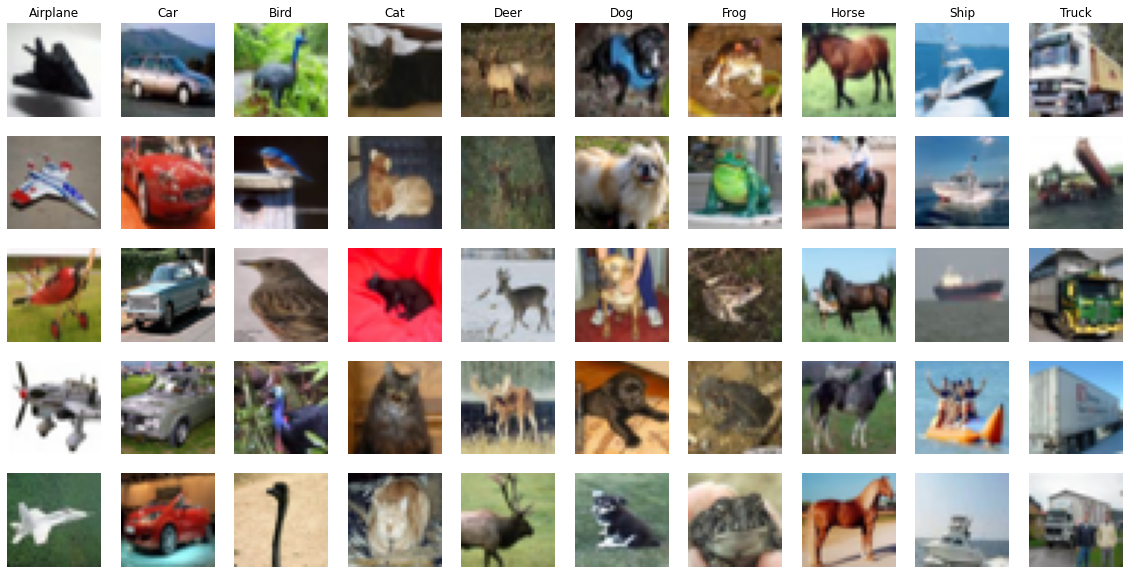

In [5]:
# Visualize five samples of each class
# using the variable axs for multiple Axes
labels = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig, axs = plt.subplots(5,10, figsize=(20,10))

for i in range(10):
  row = 0
  list_class = np.where(y_train==i)[0][:5]
  for j in list_class:
    axs[row][i].imshow(Image.fromarray(x_train[j]))
    axs[row][i].axis("off")
    axs[0][i].set_title(labels[i])

    row+=1
 

In [6]:
# Take a sample of the data by making train=10000 and test=1000
x_train= x_train[:10000]
x_test=x_test[:1000]
y_train=y_train[:10000]
y_test=y_test[:1000]

In [7]:
# need to flatten data into two dimensions only: index and flattened image data (32*32*3=3072).

x_train = x_train.reshape((-1,3072))
x_train.shape

(10000, 3072)

In [8]:
x_test = x_test.reshape((-1, 3072))
x_test

array([[158, 112,  49, ...,  21,  67, 110],
       [235, 235, 235, ..., 186, 200, 199],
       [158, 190, 222, ...,   7,   8,   7],
       ...,
       [103, 124, 101, ...,  67,  42,  37],
       [ 77, 114,  33, ...,  35,  44,  30],
       [175, 180, 174, ...,  93, 110, 131]], dtype=uint8)

In [9]:
# Normalizing the images by dividing by the max RGB value (255)
x_train = x_train / 255
x_test = x_test / 255

## Part 1. k-NN Classifier (2 Marks)
For this section you will implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results

### Bonus:

When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values. You can earn __0.5 bonus marks__ if you only need one loop, or __1 bonus mark__ if you can omit for loops for a fully vectorized distance calculation (a maximum of 1 bonus mark is available).




In [10]:
#function that measures distance between the tester points and the surrounding points and taking the majority vote
def euclidean_distance(pt1,pt2):
  distance=np.sqrt(np.sum(pt1-pt2)**2)
  return distance
  a=np.array([3,4])
  b=np.array([5,9])

  print(euclidean_distance(a,b))

In [ ]:
 # Function to calculate euclidean distance
def euclidean( x, x_train ) :
   return np.sqrt( np.sum( np.square( x - x_train ) ) )

# calculate manhattan distance
def manhattan(x, x_train):
	return sum(abs(e1-e2) for e1, e2 in zip(x,x_train))

# calculate hamming distance
def hamming(x, x_train):
	return sum(abs(e1 - e2) for e1, e2 in zip(x, x_train)) / len(x)

In [ ]:
# from tables.tests.test_suite import test
# # Write your KNN class here

class KNN:
    def __init__( self, K =3 ,distance=euclidean ) :
          
        self.K = K
        self.distance=distance
    # Function to store training set
          
    def fit( self, X_train, Y_train ) :
          
        self.X_train = X_train
          
        self.Y_train = Y_train
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X_train.shape
      
    # Function for prediction
          
    def predict( self, X_test ) :
          
        self.X_test = X_test
          
        # no_of_test_examples, no_of_features
          
        self.m_test, self.n = X_test.shape
          
        # initialize Y_predict
          
        Y_predict = np.zeros( self.m_test )
          
        for i in range( self.m_test ) :
              
            x = self.X_test[i]
              
            # find the K nearest neighbors from current test example
              
            neighbors = np.zeros( self.K )
              
            neighbors = self.find_neighbors( x )
              
            # most frequent class in K neighbors
              
            Y_predict[i] = mode( neighbors )[0][0]    
              
        return Y_predict
      
    # Function to find the K nearest neighbors to current test example
            
    def find_neighbors( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
          
        euclidean_distances = np.zeros( self.m )
          
        for i in range( self.m ) :
              
            d = self.distance( x, self.X_train[i] )
              
            euclidean_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
          
        inds = euclidean_distances.argsort()
          
        Y_train_sorted = self.Y_train[inds]
          
        return Y_train_sorted[:self.K]

    # # Function to calculate euclidean distance
    # def euclidean( self, x, x_train ) :
    #   return np.sqrt( np.sum( np.square( x - x_train ) ) )
    # def plotConfusionMatrix(self, y_pred, y_test, labels, TypeMethod='euclidean'):
    #     cm = confusion_matrix(y_test, y_pred, labels=labels)
    #     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    #     disp.plot()
    #     plt.title("The Confusion Matrix of KNN")
    #     plt.show()



Euclediean distance

In [ ]:
K_list=[]

for i in [7,33,50,137,223]:
  classifier=KNN(K=i)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  K_list.append(accuracy_score(y_test,y_pred))
  print(f'k ={i}, accuracy: {accuracy_score(y_test,y_pred):.3f}')


k =7, accuracy: 0.205
k =33, accuracy: 0.217
k =50, accuracy: 0.220
k =137, accuracy: 0.216
k =223, accuracy: 0.225


Manhatten distance

In [ ]:
K_list_acc=[]
for i in [7,33,50,137,223]:
  classifier=KNN(K=i,  distance=manhattan)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  K_list_acc.append(accuracy_score(y_test,y_pred))
  print(f'k ={i}, accuracy: {accuracy_score(y_test,y_pred):.3f}')

C:\Users\mm\AppData\Local\Temp\ipykernel_7392\2121171638.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  return sum(abs(e1-e2) for e1, e2 in zip(x,x_train))


k =7, accuracy: 0.250


C:\Users\mm\AppData\Local\Temp\ipykernel_7392\2121171638.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  return sum(abs(e1-e2) for e1, e2 in zip(x,x_train))


k =33, accuracy: 0.276


C:\Users\mm\AppData\Local\Temp\ipykernel_7392\2121171638.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  return sum(abs(e1-e2) for e1, e2 in zip(x,x_train))


k =50, accuracy: 0.253


C:\Users\mm\AppData\Local\Temp\ipykernel_7392\2121171638.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  return sum(abs(e1-e2) for e1, e2 in zip(x,x_train))


k =137, accuracy: 0.245


C:\Users\mm\AppData\Local\Temp\ipykernel_7392\2121171638.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  return sum(abs(e1-e2) for e1, e2 in zip(x,x_train))


k =223, accuracy: 0.231


From comparing euclediean,manhatten distances i found that the best k =33  brought the highest accuracy from euclediean distances

C:\Users\mm\AppData\Local\Temp\ipykernel_3396\2121171638.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  return sum(abs(e1-e2) for e1, e2 in zip(x,x_train))


k =33, accuracy: 0.276


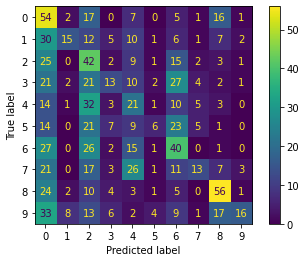

In [ ]:
classifier=KNN(K = 33 ,distance=manhattan)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
#K_list.append(accuracy_score(y_test,y_pred))
print(f'k ={33}, accuracy: {accuracy_score(y_test,y_pred):.3f}')
cm_LR=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_LR)
disp.plot()
plt.show()

### *KNN Classifier* 
By trying two types of distances such as euclediean distance and manhatten distance . giving them different values of k. I found that manhatten distance is better than euclediean distance with k=33 gives the higest accuracy and it is: 0.276 

## Part 2. Logistic Regression (3 Marks)

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mle = MultiLabelBinarizer()
y_train_new= mle.fit_transform(y_train)
y_train_new.shape

(10000, 10)

In [ ]:
y_test=y_test.reshape(-1,1)
y_test_new= mle.fit_transform(y_test)
y_test_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
# y_trainClass =y_train_new[:,0]
# y_trainClass.shape

(10000,)

In [ ]:
# y_testClass =y_test_new[:,0]
# y_testClass.shape

(1000,)

C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


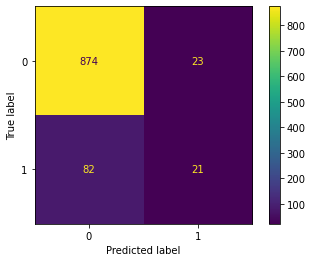

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       897
           1       0.48      0.20      0.29       103

    accuracy                           0.90      1000
   macro avg       0.70      0.59      0.61      1000
weighted avg       0.87      0.90      0.88      1000

Accuracy : 0.90%


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


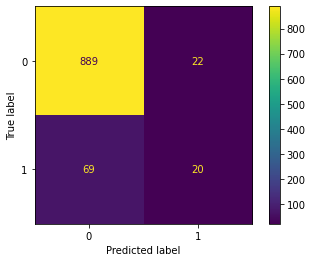

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       911
           1       0.48      0.22      0.31        89

    accuracy                           0.91      1000
   macro avg       0.70      0.60      0.63      1000
weighted avg       0.89      0.91      0.89      1000

Accuracy : 0.91%


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


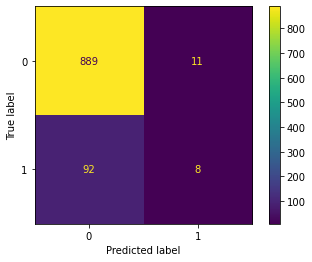

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       900
           1       0.42      0.08      0.13       100

    accuracy                           0.90      1000
   macro avg       0.66      0.53      0.54      1000
weighted avg       0.86      0.90      0.86      1000

Accuracy : 0.90%


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


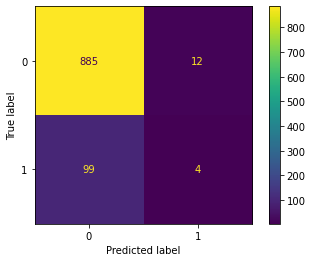

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       897
           1       0.25      0.04      0.07       103

    accuracy                           0.89      1000
   macro avg       0.57      0.51      0.50      1000
weighted avg       0.83      0.89      0.85      1000

Accuracy : 0.89%


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


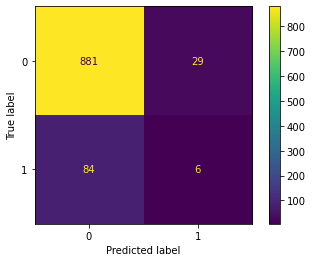

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       910
           1       0.17      0.07      0.10        90

    accuracy                           0.89      1000
   macro avg       0.54      0.52      0.52      1000
weighted avg       0.85      0.89      0.86      1000

Accuracy : 0.89%


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


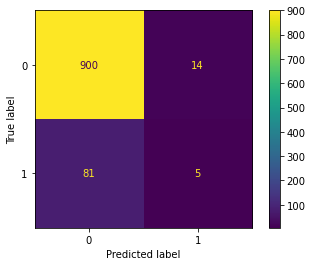

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       914
           1       0.26      0.06      0.10        86

    accuracy                           0.91      1000
   macro avg       0.59      0.52      0.52      1000
weighted avg       0.86      0.91      0.88      1000

Accuracy : 0.91%


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


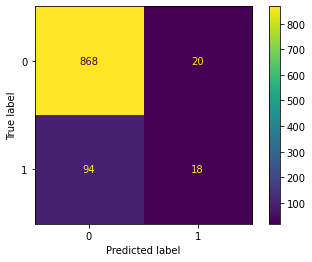

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       888
           1       0.47      0.16      0.24       112

    accuracy                           0.89      1000
   macro avg       0.69      0.57      0.59      1000
weighted avg       0.85      0.89      0.86      1000

Accuracy : 0.89%


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


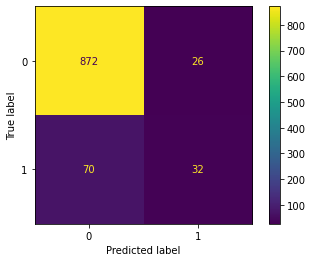

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       898
           1       0.55      0.31      0.40       102

    accuracy                           0.90      1000
   macro avg       0.74      0.64      0.67      1000
weighted avg       0.89      0.90      0.89      1000

Accuracy : 0.90%


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


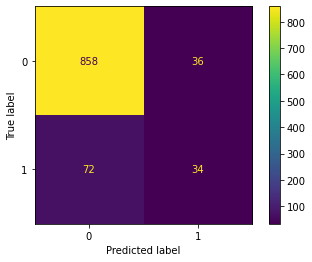

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       894
           1       0.49      0.32      0.39       106

    accuracy                           0.89      1000
   macro avg       0.70      0.64      0.66      1000
weighted avg       0.88      0.89      0.88      1000

Accuracy : 0.89%


C:\Users\mm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


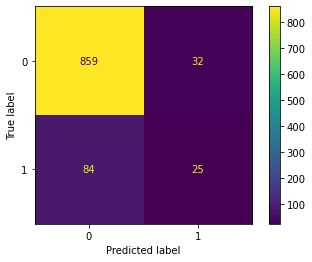

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       891
           1       0.44      0.23      0.30       109

    accuracy                           0.88      1000
   macro avg       0.67      0.60      0.62      1000
weighted avg       0.86      0.88      0.87      1000

Accuracy : 0.88%


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
#def logestic_regression (x_train,y_train_new,x_test,y_test_new):
lstPred = []

for i in range (10):
    lr = LogisticRegression()
    lr.fit(x_train,y_train_new[:,i])
    y_pred=lr.predict(x_test)
    y_probability = lr.predict_proba(x_test)[:,1]
    lstPred.append(y_probability)
    acc_LR=accuracy_score(y_test_new[:,i],y_pred)
    cm_LR=confusion_matrix(y_test_new[:,i],y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix =cm_LR)
    disp.plot()
    plt.show()
    cr= classification_report(y_test_new[:,i],y_pred)
    print(cr)
    print("Accuracy : {:.2f}%".format(acc_LR))

0.327


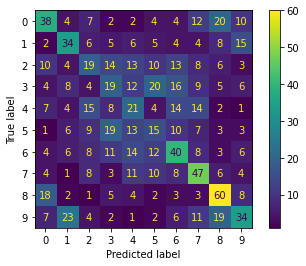

              precision    recall  f1-score   support

           0       0.40      0.37      0.38       103
           1       0.37      0.38      0.38        89
           2       0.23      0.19      0.21       100
           3       0.22      0.18      0.20       103
           4       0.22      0.23      0.22        90
           5       0.18      0.17      0.18        86
           6       0.34      0.36      0.35       112
           7       0.38      0.46      0.42       102
           8       0.45      0.57      0.50       106
           9       0.38      0.31      0.34       109

    accuracy                           0.33      1000
   macro avg       0.32      0.32      0.32      1000
weighted avg       0.32      0.33      0.32      1000



In [ ]:
best_pred =np.argmax(lstPred, axis=0)
print(accuracy_score(y_test,best_pred))
cm_LR=confusion_matrix(y_test,best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_LR)
disp.plot()
plt.show()
cr= classification_report(y_test,best_pred)
print(cr)

### *Logistic Regression classifer* 
After applying OvR at logistic Regression by using MultiLabelBinarizer. I computed the probabilities for each model from the 10 models.Then select the argMax of the probabilities giving the accuracy =0.33 

## Part 3. Support Vector Machine (SVM) Classification (4 Marks)

In Part 3. you will use Scikit-learn to perform classification, again on the Cifar10 dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.

### Bonus Mark
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

SVM baseline

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


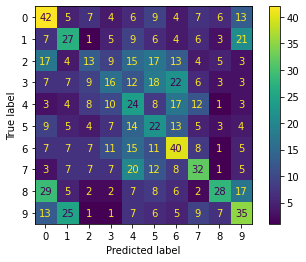

              precision    recall  f1-score   support

           0       0.31      0.41      0.35       103
           1       0.28      0.30      0.29        89
           2       0.22      0.13      0.16       100
           3       0.22      0.16      0.18       103
           4       0.19      0.27      0.22        90
           5       0.19      0.26      0.22        86
           6       0.30      0.36      0.33       112
           7       0.35      0.31      0.33       102
           8       0.48      0.26      0.34       106
           9       0.32      0.32      0.32       109

    accuracy                           0.28      1000
   macro avg       0.29      0.28      0.27      1000
weighted avg       0.29      0.28      0.28      1000

Accuracy : 0.28


In [ ]:
from sklearn.svm import LinearSVC
classifier_svc = LinearSVC(multi_class='ovr')
classifier_svc.fit(x_train,y_train)
y_pred_svc = classifier_svc.predict(x_test)
acc_svm=accuracy_score(y_test,y_pred_svc)
cm_SVM=confusion_matrix(y_test,y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_SVM)
disp.plot()
plt.show()
cr= classification_report(y_test,y_pred_svc)
print(cr)
print("Accuracy : {:.2f}".format(acc_svm))

At c= 0.0001


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


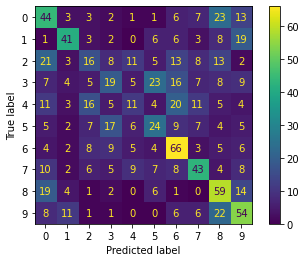

              precision    recall  f1-score   support

           0       0.34      0.43      0.38       103
           1       0.55      0.46      0.50        89
           2       0.24      0.16      0.19       100
           3       0.27      0.18      0.22       103
           4       0.23      0.12      0.16        90
           5       0.30      0.28      0.29        86
           6       0.44      0.59      0.50       112
           7       0.45      0.42      0.44       102
           8       0.39      0.56      0.46       106
           9       0.40      0.50      0.44       109

    accuracy                           0.38      1000
   macro avg       0.36      0.37      0.36      1000
weighted avg       0.36      0.38      0.36      1000

At c= 0.001


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


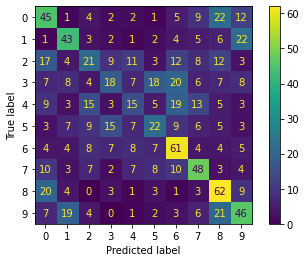

              precision    recall  f1-score   support

           0       0.37      0.44      0.40       103
           1       0.45      0.48      0.46        89
           2       0.28      0.21      0.24       100
           3       0.30      0.17      0.22       103
           4       0.25      0.17      0.20        90
           5       0.31      0.26      0.28        86
           6       0.42      0.54      0.48       112
           7       0.44      0.47      0.46       102
           8       0.42      0.58      0.49       106
           9       0.40      0.42      0.41       109

    accuracy                           0.38      1000
   macro avg       0.36      0.37      0.36      1000
weighted avg       0.37      0.38      0.37      1000

At c= 0.01


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


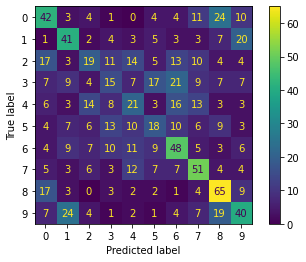

              precision    recall  f1-score   support

           0       0.38      0.41      0.39       103
           1       0.39      0.46      0.42        89
           2       0.29      0.19      0.23       100
           3       0.22      0.15      0.17       103
           4       0.26      0.23      0.24        90
           5       0.25      0.21      0.23        86
           6       0.38      0.43      0.40       112
           7       0.43      0.50      0.46       102
           8       0.45      0.61      0.52       106
           9       0.38      0.37      0.37       109

    accuracy                           0.36      1000
   macro avg       0.34      0.36      0.34      1000
weighted avg       0.34      0.36      0.35      1000

At c= 0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


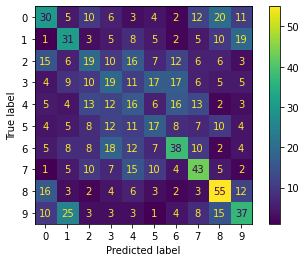

              precision    recall  f1-score   support

           0       0.33      0.29      0.31       103
           1       0.31      0.35      0.33        89
           2       0.22      0.19      0.20       100
           3       0.20      0.18      0.19       103
           4       0.16      0.18      0.17        90
           5       0.22      0.20      0.21        86
           6       0.36      0.34      0.35       112
           7       0.38      0.42      0.40       102
           8       0.42      0.52      0.47       106
           9       0.37      0.34      0.35       109

    accuracy                           0.30      1000
   macro avg       0.30      0.30      0.30      1000
weighted avg       0.30      0.30      0.30      1000

At c= 1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


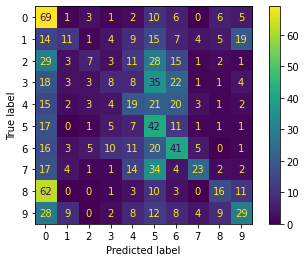

              precision    recall  f1-score   support

           0       0.24      0.67      0.36       103
           1       0.31      0.12      0.18        89
           2       0.29      0.07      0.11       100
           3       0.21      0.08      0.11       103
           4       0.21      0.21      0.21        90
           5       0.19      0.49      0.27        86
           6       0.30      0.37      0.33       112
           7       0.55      0.23      0.32       102
           8       0.37      0.15      0.21       106
           9       0.39      0.27      0.32       109

    accuracy                           0.27      1000
   macro avg       0.30      0.26      0.24      1000
weighted avg       0.31      0.27      0.24      1000

At c= 10


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


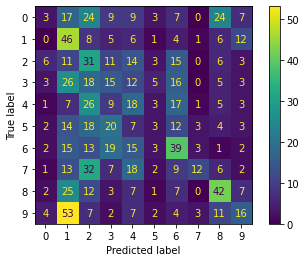

              precision    recall  f1-score   support

           0       0.12      0.03      0.05       103
           1       0.20      0.52      0.29        89
           2       0.16      0.31      0.21       100
           3       0.15      0.15      0.15       103
           4       0.16      0.20      0.18        90
           5       0.12      0.03      0.05        86
           6       0.30      0.35      0.32       112
           7       0.52      0.12      0.19       102
           8       0.38      0.40      0.39       106
           9       0.28      0.15      0.19       109

    accuracy                           0.23      1000
   macro avg       0.24      0.22      0.20      1000
weighted avg       0.24      0.23      0.21      1000

At c= 100


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


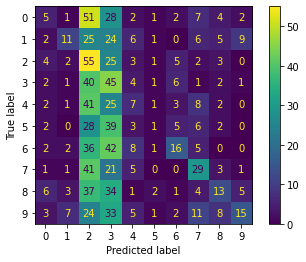

              precision    recall  f1-score   support

           0       0.17      0.05      0.08       103
           1       0.38      0.12      0.19        89
           2       0.15      0.55      0.23       100
           3       0.14      0.44      0.21       103
           4       0.16      0.08      0.10        90
           5       0.10      0.01      0.02        86
           6       0.40      0.14      0.21       112
           7       0.37      0.28      0.32       102
           8       0.31      0.12      0.18       106
           9       0.45      0.14      0.21       109

    accuracy                           0.20      1000
   macro avg       0.26      0.19      0.18      1000
weighted avg       0.27      0.20      0.18      1000

At c= 1000


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


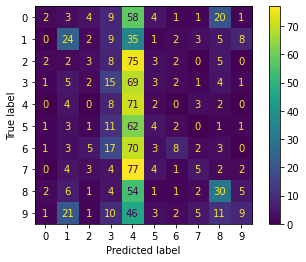

              precision    recall  f1-score   support

           0       0.20      0.02      0.04       103
           1       0.32      0.27      0.29        89
           2       0.14      0.03      0.05       100
           3       0.16      0.15      0.15       103
           4       0.12      0.79      0.20        90
           5       0.14      0.05      0.07        86
           6       0.38      0.07      0.12       112
           7       0.23      0.05      0.08       102
           8       0.36      0.28      0.32       106
           9       0.33      0.08      0.13       109

    accuracy                           0.17      1000
   macro avg       0.24      0.18      0.15      1000
weighted avg       0.24      0.17      0.14      1000

The accuracies: [0.377, 0.381, 0.36, 0.305, 0.265, 0.225, 0.197, 0.171]


In [ ]:
c= [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
accuracy=[]
for i in c:
    print("At c=",i)
    svc=LinearSVC(multi_class='ovr',C=i ,random_state=0)
    svc.fit(x_train,y_train)
    y_pred_svc= svc.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred_svc))
    cm_svc=confusion_matrix(y_test,y_pred_svc)
    disp = ConfusionMatrixDisplay(confusion_matrix =cm_svc)
    disp.plot()
    plt.show()
    cr= classification_report(y_test,y_pred_svc)
    print(cr)
print("The accuracies:",accuracy)

Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.

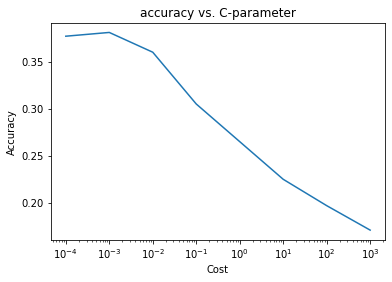

In [ ]:
fig = plt.figure()
axis = fig.add_subplot()

line, = axis.plot(c,accuracy)

axis.set_xscale('log')
plt.title('accuracy vs. C-parameter')
plt.xlabel('Cost')
plt.ylabel('Accuracy')

plt.show()

Add a regularization term.

In [ ]:
c= [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
Accuracies=[]
for i in c:
    Reg=LinearSVC(multi_class='ovr',C=i,penalty='l1',dual=False ,random_state=0)
    Reg.fit(x_train,y_train)
    y_pred= Reg.predict(x_test)
    Accuracies.append(accuracy_score(y_test,y_pred))
print("The accuracies =",Accuracies)

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mm\anaconda3\lib\site-packages\sklea

The accuracies = [0.1, 0.168, 0.353, 0.387, 0.295, 0.276, 0.276, 0.274]


C:\Users\mm\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


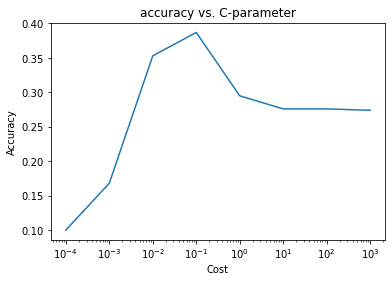

In [ ]:
fig = plt.figure()
axis = fig.add_subplot()

line, = axis.plot(c,Accuracies)

axis.set_xscale('log')
plt.title('accuracy vs. C-parameter')
plt.xlabel('Cost')
plt.ylabel('Accuracy')

plt.show()

 The final experiment you will use the SVC() function to run the classifer with a kernel.

In [ ]:
from sklearn.svm import SVC
accuracies=np.zeros((5,5))
for i,cost in enumerate([0.01, 0.1, 1, 10, 100]):
  print(f'number', i , f'cost',cost)
  for j,gamma in enumerate([0.01, 0.1, 1, 10, 100]):
        print(f'number', j , f'gamma',gamma)
        svc_clf=SVC(C=cost,gamma=gamma,random_state=0,kernel='rbf')
        svc_clf.fit(x_train,y_train)
        y_pred=svc_clf.predict(x_test)
        acc=accuracy_score(y_test,y_pred)
        accuracies[i,j]=acc

number 0 cost 0.01
number 0 gamma 0.01


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 1 gamma 0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 2 gamma 1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 3 gamma 10


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 4 gamma 100


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 1 cost 0.1
number 0 gamma 0.01


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 1 gamma 0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 2 gamma 1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 3 gamma 10


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 4 gamma 100


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 2 cost 1
number 0 gamma 0.01


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 1 gamma 0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 2 gamma 1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 3 gamma 10


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 4 gamma 100


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 3 cost 10
number 0 gamma 0.01


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 1 gamma 0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 2 gamma 1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 3 gamma 10


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 4 gamma 100


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 4 cost 100
number 0 gamma 0.01


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 1 gamma 0.1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 2 gamma 1


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 3 gamma 10


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number 4 gamma 100


C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracies

array([[0.172, 0.1  , 0.1  , 0.1  , 0.1  ],
       [0.363, 0.1  , 0.1  , 0.1  , 0.1  ],
       [0.469, 0.21 , 0.1  , 0.1  , 0.1  ],
       [0.483, 0.203, 0.1  , 0.1  , 0.1  ],
       [0.484, 0.203, 0.1  , 0.1  , 0.1  ]])

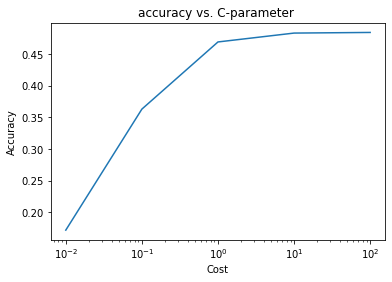

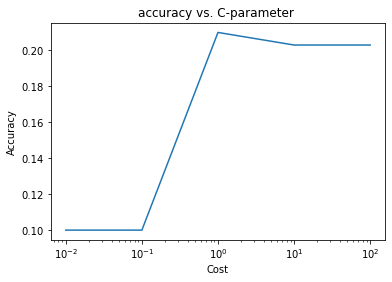

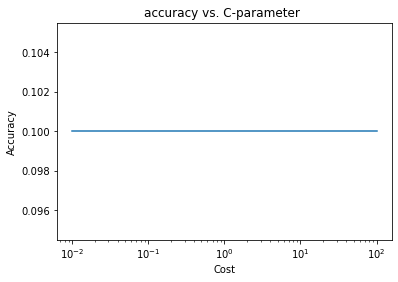

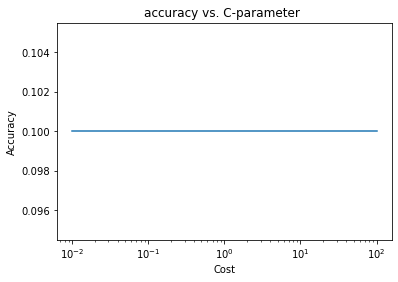

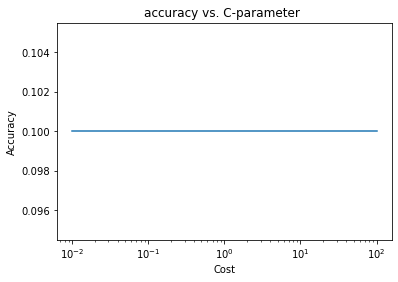

In [ ]:
c=[0.01, 0.1, 1, 10, 100]
for i in range(0,5):
    fig = plt.figure()
    axis = fig.add_subplot()

    line, = axis.plot(c,accuracies[:,i])

    axis.set_xscale('log')
    plt.title('accuracy vs. C-parameter ')
    plt.xlabel('Cost')
    plt.ylabel('Accuracy')

    plt.show()

# The Best model with the highest accuracy when C=100 and gamma = 0.01 

C:\Users\mm\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best Accuracy  0.484
              precision    recall  f1-score   support

           0       0.57      0.46      0.51       103
           1       0.56      0.60      0.58        89
           2       0.43      0.41      0.42       100
           3       0.30      0.39      0.34       103
           4       0.34      0.38      0.36        90
           5       0.35      0.27      0.30        86
           6       0.54      0.51      0.53       112
           7       0.61      0.53      0.57       102
           8       0.60      0.66      0.63       106
           9       0.54      0.60      0.57       109

    accuracy                           0.48      1000
   macro avg       0.49      0.48      0.48      1000
weighted avg       0.49      0.48      0.48      1000



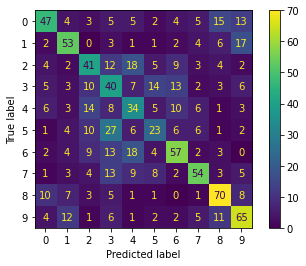

In [ ]:
from sklearn.svm import SVC
accuracies=np.zeros((5,5))

svc_clf=SVC(C=100,gamma=0.01,random_state=0,kernel='rbf')
svc_clf.fit(x_train,y_train)
y_pred_best=svc_clf.predict(x_test)
best_accuracy=accuracy_score(y_test,y_pred_best)
#accuracies[i,j]=acc
print("The best Accuracy ", best_accuracy)
cm = confusion_matrix(y_test,y_pred_best, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm )
disp.plot()
cr= classification_report(y_test,y_pred_best)
print(cr)

###SVM Classifier
After applying an SVM baseline using the LinearSVC() function and "ovr" for multiclass the accuracy = 0.28.Then when using different values of cost the highest accuracy = 0.381 at C=0.001 . After using L1 regularization, the best accuracy became 0.387 at C=0.1 .Finally,after doing the optimal combination of values for the cost and gamma parameters the best accuracy=0.484 at C=100 and gamma=0.01 

## Part 4. Write a Conclusion (1 Mark)

Write a conclusion comparing the results from each part of the assignment. Comment on the suitability of each method for this task.

**After applying three Models:**


The First Model:  KNN classifier, the highest accuracy=0.276 at K= 33 by using manhatten distance .

The Second Model: Logistic Regression classifer, The argMax of the probabilities for each model from the 10 models= 0.33 

The Third Model: SVM Classifer, the highest accuracy =0.484 when applying the optimal combination of values for the cost=100 and gamma =0.01 ,so the champion model which brings the best accuracy is SVM Classifer

<!-- Write your conclusion here -->